<a href="https://colab.research.google.com/github/cheveanrichards/My-Graduate-Project/blob/master/DecesionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Information Gain for Survived: 0.08286373372692335
Information Gain for Sex: 0.013206245885198253
Information Gain for Age: 0.28874334228190857
Information Gain for Siblings/Spouses Aboard: 0.05049170607374842
Information Gain for Parents/Children Aboard: 0.013545183186540966
Information Gain for Fare: 1.3844495055562074
Total gain from all split = 1.833299716710527
Accuracy: 0.9438202247191011


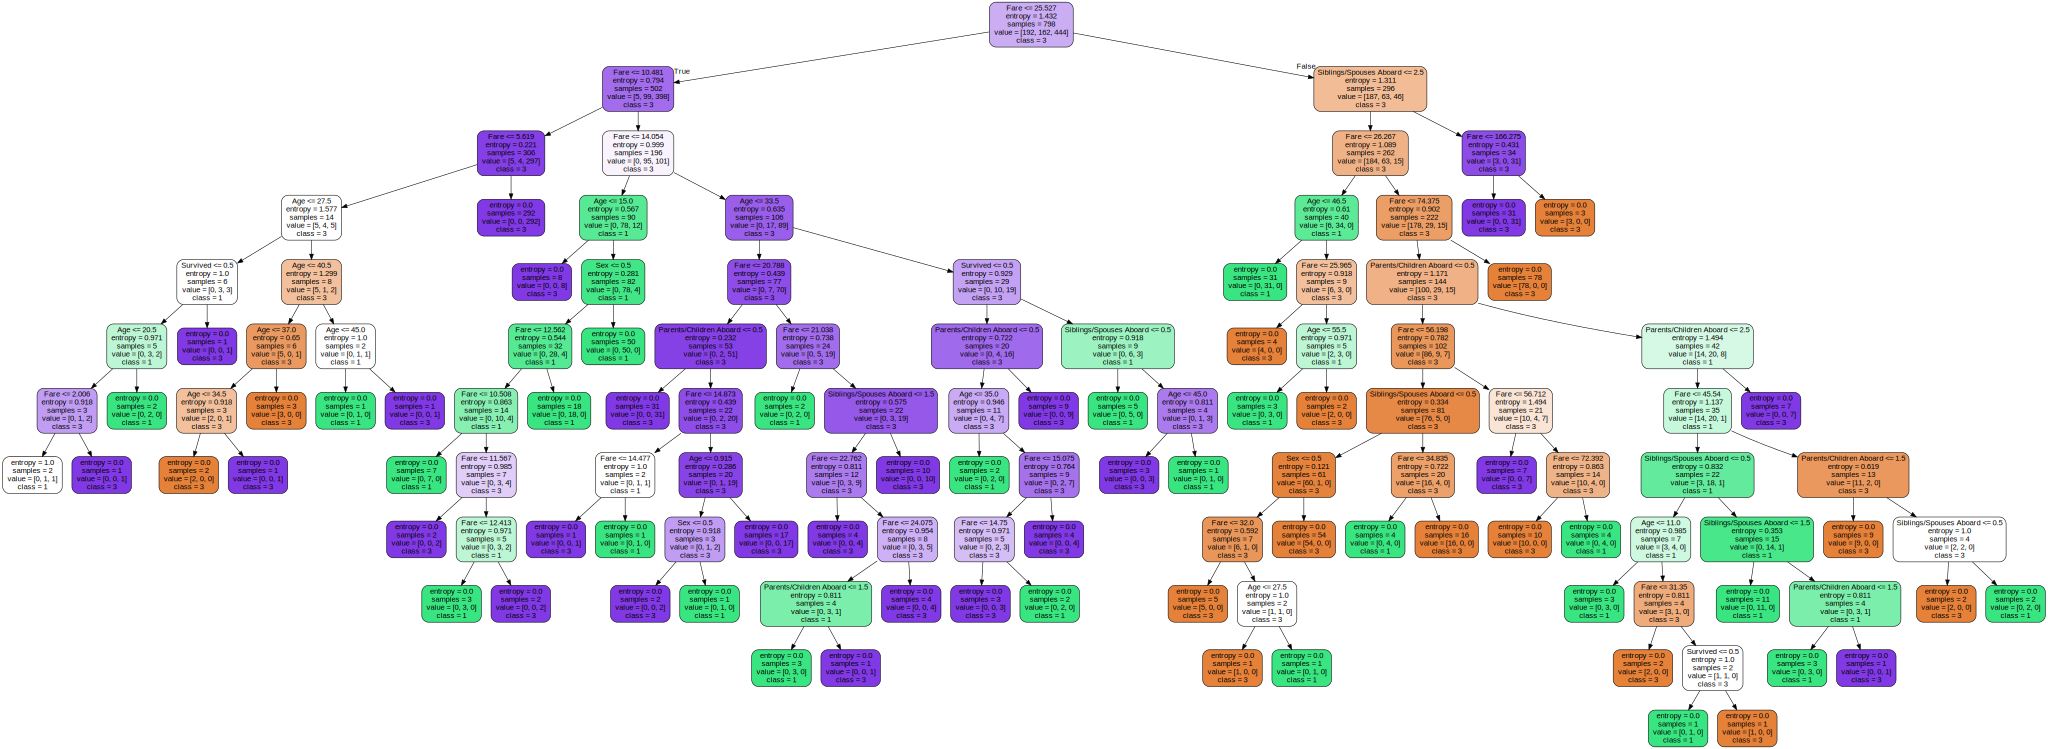

In [46]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from graphviz import Source

# Load your dataset (you can load your dataset using pd.read_csv)
data = pd.read_csv("titanic(1).csv")

# Preprocess data
# Encode categorical variables (e.g., 'Sex' and 'Pclass')
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

data['Pclass'] = data['Pclass'].astype(str)

# Calculate the entropy of the target variable
def calculate_entropy(data, target_variable):
    counts = data[target_variable].value_counts()
    total_samples = len(data)
    entropy = 0
    for count in counts:
        p = count / total_samples
        entropy -= p * np.log2(p)
    return entropy

# Define a function to calculate information gain for a feature
def calculate_information_gain(data, feature, target_variable):
    entropy_before_split = calculate_entropy(data, target_variable)
    values = data[feature].unique()
    total_samples = len(data)
    weighted_entropy_after_split = 0

    for value in values:
        subset = data[data[feature] == value]
        subset_samples = len(subset)
        subset_entropy = calculate_entropy(subset, target_variable)
        weighted_entropy_after_split += (subset_samples / total_samples) * subset_entropy

    information_gain = entropy_before_split - weighted_entropy_after_split
    return information_gain


# Define features and target variable
X = data[['Survived', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']]
y = data['Pclass']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Create and fit a DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=None)
clf.fit(X_train, y_train)

feature_importances = clf.feature_importances_

# Calculate information gain for each feature
attributes = ['Survived', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']
information_gains = {}

for i, attribute in enumerate(attributes):
    information_gain = calculate_information_gain(data, attribute, 'Pclass')
    information_gains[attribute] = information_gain

# Print information gains for each feature
gain_sum = 0
for attribute, gain in information_gains.items():
    gain_sum = gain_sum + gain
    print(f"Information Gain for {attribute}: {gain}")
print(f"Total gain from all split = {gain_sum}")

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


# Make Decision Tree graph
export_graphviz(
    clf,
    out_file = "titanic.dot",
    feature_names=['Survived', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare'],
    class_names= data['Pclass'],
    rounded=True,
    filled=True
)

# Source File
Source.from_file("titanic.dot")

